In [2]:
# Directories
import os
os.chdir(r"E:\academy\OneDrive - IIT Delhi\3. IIT DELHI\2. Academics\1_PAPER\2_Analysis")
print(os.getcwd())


E:\academy\OneDrive - IIT Delhi\3. IIT DELHI\2. Academics\1_PAPER\2_Analysis


In [3]:
#Array packages
import cartopy.crs as ccrs
import pandas as pd
import numpy as np
import xarray as xr
import netCDF4 as nc4

from scipy.stats import kendalltau
import pymannkendall as mk

#plots
import matplotlib.pyplot as plt
import rioxarray as rio
import geopandas as gpd
from shapely.geometry import mapping
import matplotlib.ticker as ticker
from matplotlib.ticker import MultipleLocator

#Progress meter
from dask.diagnostics import ProgressBar
from tqdm import tqdm

# Directories
import os
import glob
import dask
#import h5netcdf
import scipy


C:\Users\sstar\anaconda3\envs\imed\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


# Result and discussions data

### 1 Median values

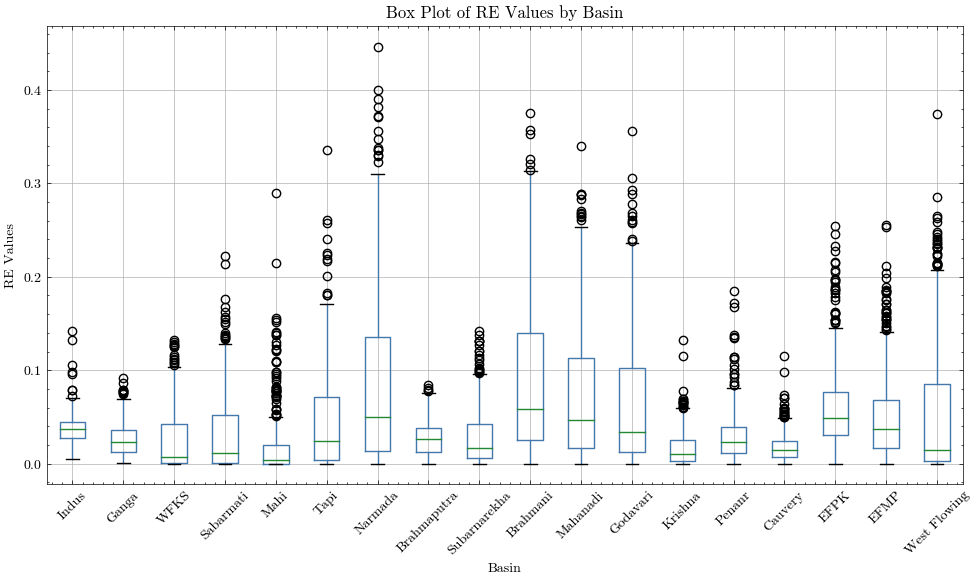

In [3]:
model=["LIS_MERRA2","LIS_IMD","LIS_CHIRPS","LIS_ERA5","LIS_IMDc","LIS_IMDcnew"]
var=['TotalPrecip_tavg','Evap_tavg','Qs_tavg','RE','RE_cleaned']
ssn=['Pre-monsoon','Monsoon','Post-monsoon','Winter']
ssn_m=[[3,4,5],[6,7,8,9],[10,11],[12,1,2]]

mdl=5
ss=1

ds_RM = xr.open_mfdataset(f'DATA_p/LIS/{model[mdl]}/{model[mdl]}_reg_All.nc',engine='netcdf4', parallel=True,chunks={'time': 'auto'})
basin=ds_RM.region.values


data = { 'Median': [np.nan], 'Quant_0.1': [np.nan], 'Quant_0.9': [np.nan]}
index = basin 
df = pd.DataFrame(data, index=index)
df_box=pd.DataFrame(columns=basin)

#ds_RM=ds_RM.isel(season=0)

for i, Reg in enumerate(basin):

    #plt.style.use(['science','no-latex','bright'])

   
    re=ds_RM['RE'].isel(region=i).compute()

    df_box[Reg]=re.compute().values
    df.loc[Reg,'Median']=re.median().compute().values
    df.loc[Reg,'Quant_0.1']=re.quantile(0.1).compute().values
    df.loc[Reg,'Quant_0.9']=re.quantile(0.9).compute().values


#Box plot of values
import scienceplots
plt.style.use(['science','no-latex','bright'])
plt.figure(figsize=(10, 6))
df_box.boxplot()
plt.title('Box Plot of RE Values by Basin')
plt.xlabel('Basin')
plt.ylabel('RE Values')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


#### 2 RE analysis over a fixed range of precipitation

C:\Users\sstar\AppData\Local\Temp\ipykernel_21860\3855990339.py:31: RuntimeWarning: Mean of empty slice.
  df.iloc[i,2]=re1[2].mean()
C:\Users\sstar\anaconda3\envs\imed\Lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
C:\Users\sstar\AppData\Local\Temp\ipykernel_21860\3855990339.py:39: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('Reds', 3)  # Choose a colormap and number of colors


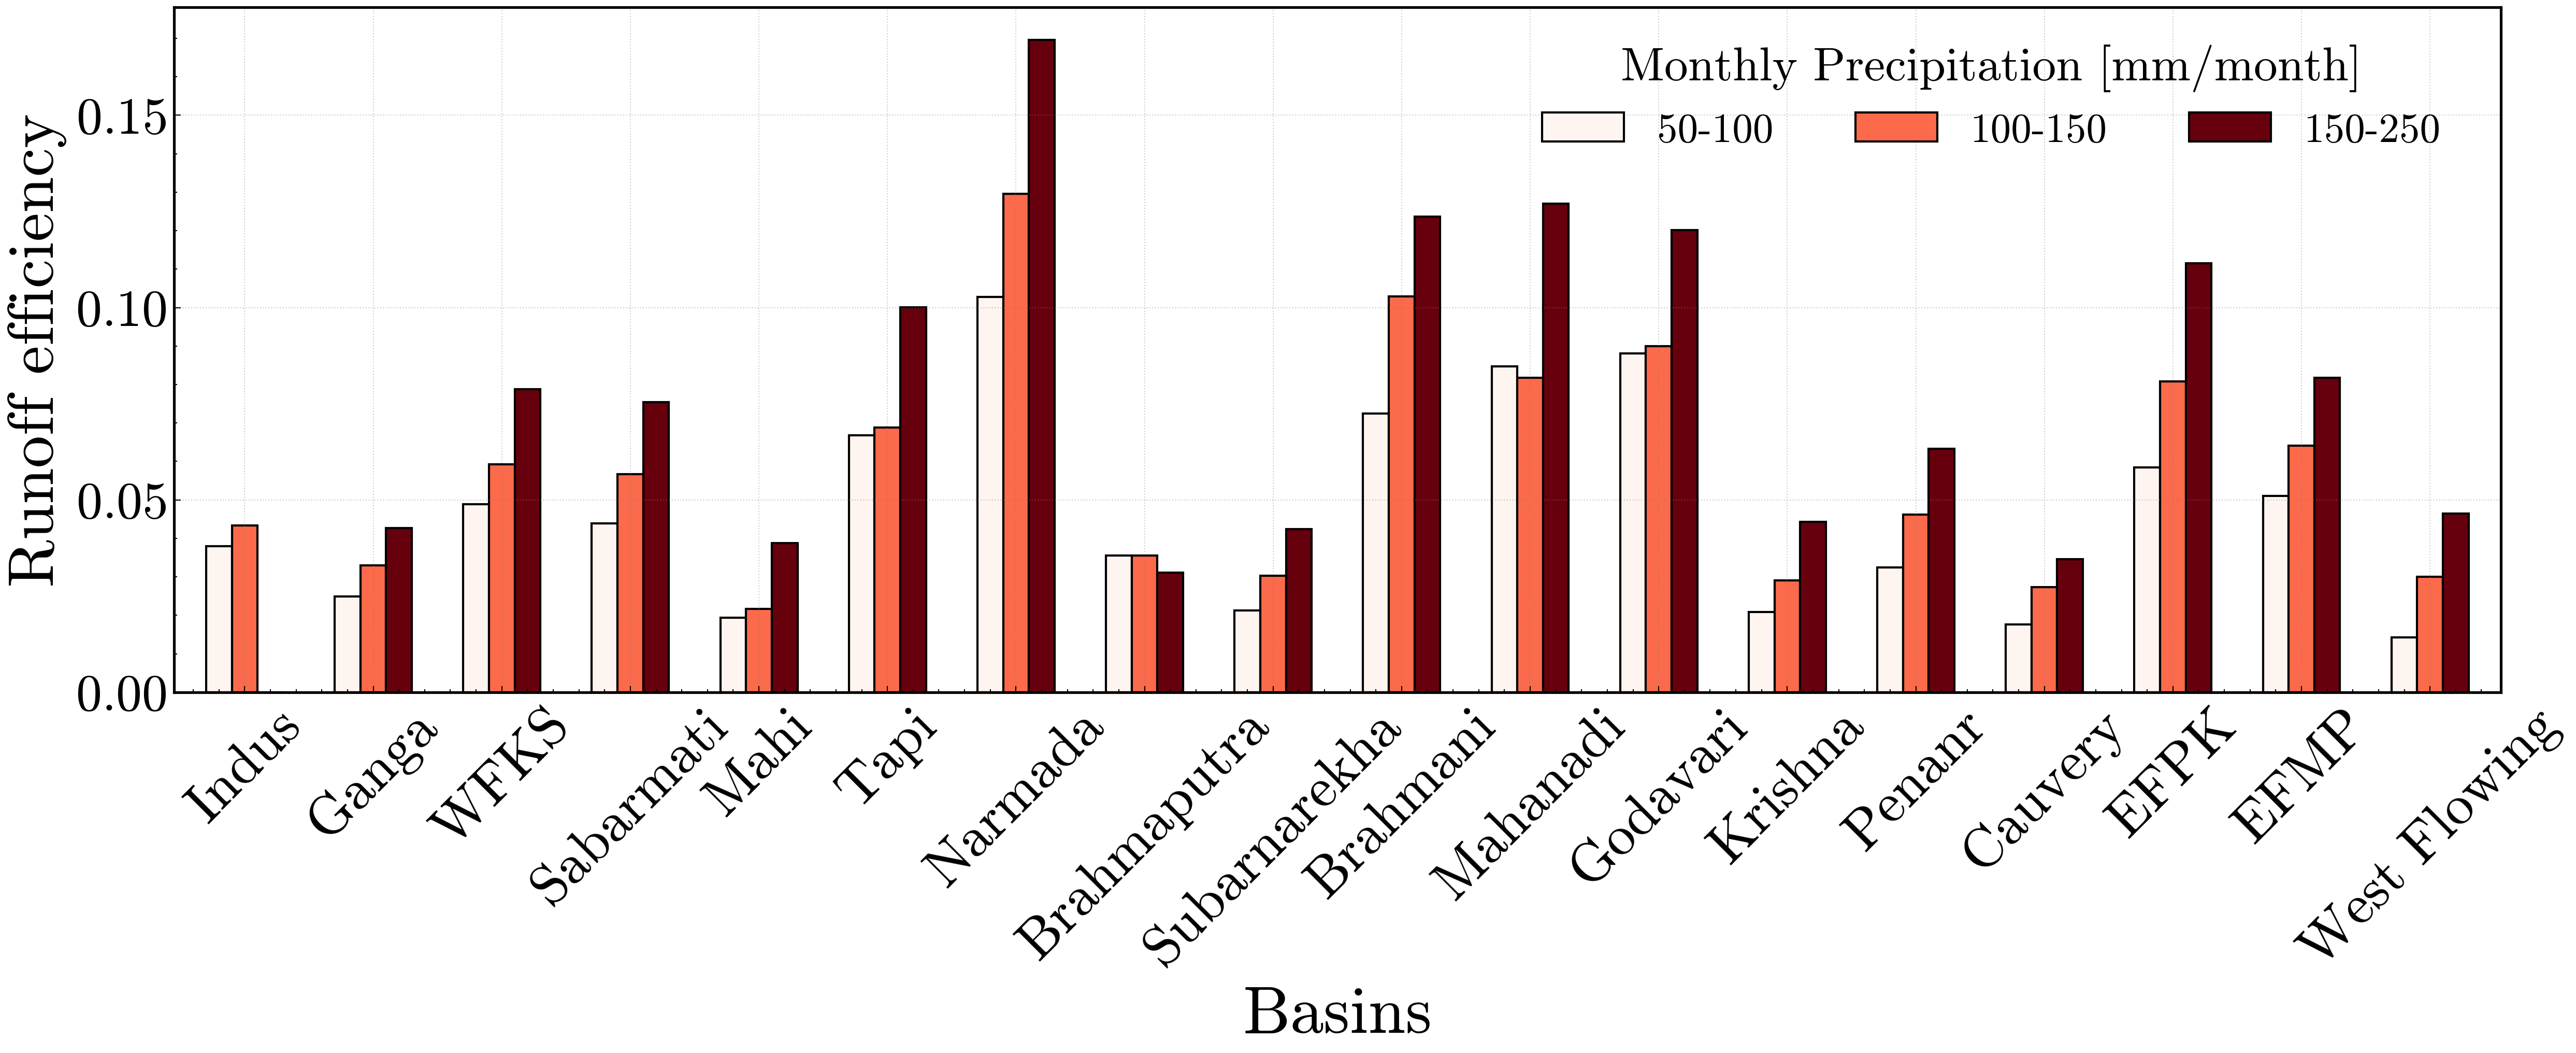

In [4]:
import scienceplots
plt.style.use(['science','no-latex','bright'])
model=["LIS_MERRA2","LIS_IMD","LIS_CHIRPS","LIS_ERA5","LIS_IMDc","LIS_IMDcnew"]
var=['TotalPrecip_tavg','Evap_tavg','Qs_tavg','RE','RE_cleaned']
mdl=5

ds_RM = xr.open_mfdataset(f'DATA_p/LIS/{model[mdl]}/{model[mdl]}_reg_All.nc',engine='netcdf4', parallel=True,chunks={'time': 'auto'})
basin=ds_RM.region.values

p_rng=[[50,100],[100,150],[150,250]]
data = ['50-100','100-150','150-250']
df = pd.DataFrame(columns=data,index=basin)
df_box=pd.DataFrame(columns=basin)


for i, Reg in enumerate(basin):

    #plt.style.use(['science','no-latex','bright'])

    ppt=ds_RM['TotalPrecip_tavg'].isel(region=i).compute().values
    re=ds_RM['RE'].isel(region=i).compute().values
    #re=ds_RM['SoilMoist_tavg'].isel(region=i).mean(dim='SoilMoist_profiles').compute().values
    re1=[]
    for j in range(3):
        idx=(ppt>p_rng[j][0]) & (ppt<p_rng[j][1])
        re1.append(re[idx])

    #df_box[Reg]=re1
    df.iloc[i,0]=re1[0].mean()
    df.iloc[i,1]=re1[1].mean()
    df.iloc[i,2]=re1[2].mean()
    


#Box plot of values
# Plotting bar plot with increased size
fig, ax = plt.subplots(figsize=(17, 7),dpi=300)  # Increased size

cmap = plt.cm.get_cmap('Reds', 3)  # Choose a colormap and number of colors
colors = [cmap(i) for i in range(3)] 
df.plot.bar(rot=45, ax=ax,color= colors,width=0.6,edgecolor='black')

[x.set_linewidth(1.25) for x in ax.spines.values()]
ax.grid(True, color= 'grey', alpha=0.4, linestyle='dotted')


#ax.set_title('Bar Plot of RE Values by Basin',fontsize=17)
ax.set_xlabel('Basins',fontsize=31)
ax.set_ylabel('Runoff efficiency',fontsize=30)
ax.yaxis.set_tick_params(which='both', bottom=True, top=False,labelsize=24) 
ax.xaxis.set_tick_params(which='both', left=True, right=False,labelsize=26)

ax.legend(loc='upper right', bbox_to_anchor=(0.99, 1),title='Monthly Precipitation [mm/month]',title_fontsize=22,ncol=3,fontsize=19)

plt.tight_layout()
plt.savefig('2_RE analysis/1_mean_var/outputs/RE_fixedppt.jpeg')

In [18]:
## The lsm preprocessed result only have 4 variable. If you want to study the behavious of other variables
# like Qsub use should used non preprocessed result of model 4. Qsub is the reason that the westflowing region has low re despite high ppt
mdl=4
model=["LIS_MERRA2","LIS_IMD","LIS_CHIRPS","LIS_ERA5","LIS_IMDc","LIS_IMDcnew"]
var=['TotalPrecip_tavg','Evap_tavg','Qs_tavg']
ssn=['Pre-monsoon','Monsoon','Post-monsoon','Winter']
ssn_m=[[3,4,5],[6,7,8,9],[10,11],[12,1,2]]

lsm = xr.open_mfdataset(f"DATA_p/{model[mdl]}_1980_2021.nc",engine='netcdf4', parallel=True,chunks={'time': 'auto'})
lsm=lsm*60*60*24*30

gdf_p=gpd.read_file('DATA_p/shapefile/south_asia_p.shp')
dataset=[]
lsm_R1=lsm
for i in range(len(gdf_p.Basin)):
    
    B=gdf_p[gdf_p['Basin'] == gdf_p['Basin'][i]]
    lsm_R1.rio.set_spatial_dims(y_dim="lat",x_dim="lon", inplace=True)
    lsm_R1.rio.write_crs("EPSG:4326", inplace=True)
    lsm_clip = lsm_R1.rio.clip(B.geometry.apply(mapping), B.crs, drop=True)
    A=lsm_clip.mean(dim=['lat','lon']).expand_dims(dim='region')
    dataset.append(A)
    
lsm_R_all = xr.concat(dataset, dim='region')
lsm_R_all['region'] = np.array(gdf_p.Basin)
ds_RM=lsm_R_all
lsm_R_all
lsm_R_all=lsm_R_all.mean(dim='SoilMoist_profiles')

dataset=[]
lsm=lsm_R_all
for ss in range(4):
    if ss!=3:
        lsm_ssn=lsm.sel(time=lsm["time.month"].isin(ssn_m[ss]))
        lsm_ssn=lsm_ssn.groupby("time.year").mean(dim="time")
        print("1")
    else:
        lsm_roll = lsm.rolling(time=3).mean()
        lsm_ssn=lsm_roll.isel(time=lsm_roll["time.month"].isin([1])).groupby("time.year").mean()
        lsm_ssn=lsm_ssn.where(lsm_ssn['year'] != 1980, lsm_ssn.isel(year=1))
        print("3")

    dataset.append(lsm_ssn.expand_dims(dim='season'))

lsm_ssn = xr.concat(dataset, dim='season')
lsm_ssn=lsm_ssn.assign_coords(season=ssn)

1
1
1
3


In [35]:
lsm_ssn

,Array,Chunk
Bytes,11.81 kiB,4 B
Shape,"(4, 42, 18)","(1, 1, 1)"
Count,23662 Tasks,3024 Chunks
Type,float32,numpy.ndarray
,Array,Chunk
Bytes,11.81 kiB,4 B
Shape,"(4, 42, 18)","(1, 1, 1)"
Count,23662 Tasks,3024 Chunks
Type,float32,numpy.ndarray
,Array,Chunk


## 3 RE vs  precipitation mean comparison

In [8]:
import scienceplots
model=["LIS_MERRA2","LIS_IMD","LIS_CHIRPS","LIS_ERA5","LIS_IMDc","LIS_IMDcnew"]
var=['TotalPrecip_tavg','Evap_tavg','Qs_tavg','RE','RE_cleaned']
mdl=5

ds_RM = xr.open_mfdataset(f'DATA_p/LIS/{model[mdl]}/{model[mdl]}_reg_ssn.nc',engine='netcdf4', parallel=True,chunks={'time': 'auto'})
basin=ds_RM.region.values

data = ['Pre-monsoon','Monsoon','Post-monsoon','Winter']
df_re = pd.DataFrame(columns=data,index=basin)
df_re = df_re.apply(pd.to_numeric, errors='coerce')

df_ppt = pd.DataFrame(columns=data,index=basin)
df_ppt = df_re.apply(pd.to_numeric, errors='coerce')

for i, Reg in enumerate(basin):

    plt.style.use(['science','no-latex','bright'])

    #df_box[Reg]=re1
    df_re.iloc[i,:] = [ds_RM['RE'].isel(region=i, season=j).mean().compute().values for j in range(4)]
    df_ppt.iloc[i,:] = [ds_RM['TotalPrecip_tavg'].isel(region=i, season=j).mean().compute().values for j in range(4)]

#Box plot of values
# Plotting bar plot with increased size
fig, ax = plt.subplots(figsize=(20, 12),nrows=2,gridspec_kw={'hspace': 0.05},dpi=600)  # Increased size

cmap = plt.cm.get_cmap('Reds', 4)  # Choose a colormap and number of colors
colors = [cmap(i) for i in range(4)] 

df_re.plot.bar(rot=45, ax=ax[0],color= colors,width=0.6,edgecolor='black')

[x.set_linewidth(1.45) for x in ax[0].spines.values()]
[x.set_linewidth(1.45) for x in ax[1].spines.values()]
ax[0].grid(True, color= 'grey', alpha=0.4, linestyle='dotted')
ax[0].set_ylim(0,0.28)


ax[1].invert_yaxis() 
df_ppt.plot.bar(rot=45,ax=ax[1],width=0.6 , color= colors, edgecolor='black')
ax[1].set_ylim(420,0)




#ax.set_title('Bar Plot of RE Values by Basin',fontsize=17)
#ax[1].set_xlabel('Basins',fontsize=31)
ax[0].set_ylabel('Runoff Efficiency',fontsize=27,labelpad=17)
ax[1].set_ylabel('Precipitation',fontsize=27,labelpad=17)

ax[0].yaxis.set_tick_params(which='both', bottom=True, top=False,labelsize=23.5) 
ax[0].xaxis.set_tick_params(which='both', left=True, right=False,labelbottom=False,labelsize=28)
ax[1].yaxis.set_tick_params(which='both', left=True, right=False,labelsize=23.5)
ax[1].xaxis.set_tick_params(which='both', left=True, right=False,labelsize=23.5)

ax[0].legend(loc='upper right', bbox_to_anchor=(0.90, 1),title_fontsize=24,ncol=4,fontsize=24)
ax[1].legend().remove()


plt.tight_layout()
plt.savefig('2_RE analysis/1_mean_var/outputs/seasonal mean ppt_evap.jpeg',dpi=600)

C:\Users\sstar\AppData\Local\Temp\ipykernel_21860\2967158940.py:28: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('Reds', 4)  # Choose a colormap and number of colors
C:\Users\sstar\AppData\Local\Temp\ipykernel_21860\2967158940.py:60: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()




### 5. Variance comparison

In [37]:
mdl=5
ss=1

ds_RM = xr.open_mfdataset(f'DATA_p/LIS/{model[mdl]}/{model[mdl]}_reg_ssn.nc',engine='netcdf4', parallel=True,chunks={'time': 'auto'})
basin=ds_RM.region.values


data = { 'var_RE': [np.nan], 'var_P': [np.nan], 'Ratio': [np.nan]}
index = basin 
df = pd.DataFrame(data, index=index)

for i, Reg in enumerate(basin):

    plt.style.use(['science','no-latex','bright'])
    
    ds_RM1=ds_RM.isel(season=ss)
    re=ds_RM1['RE'].isel(region=i)
    ppt=ds_RM1['TotalPrecip_tavg'].isel(region=i)

    
    df.loc[Reg,'var_RE']=re.std().compute().values
    df.loc[Reg,'var_P']=ppt.std().compute().values
    df.loc[Reg,'Ratio']=re.std().compute().values/ppt.std().compute().values
    

# Plotting
fig,ax=plt.subplots(3,1,figsize=(5,5), facecolor='white', dpi=300,sharex=True)
ax=ax.flatten()
col=df.columns

for i in range(3):

    # Plotting
    ax[i].bar(df.index, df[col[i]])
    ax[i].set_xlabel('Region')
    ax[i].set_ylabel('Ratio')
    ax[i].set_title(col[i])
    ax[i].tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

array([[10, 20],
       [15, 25],
       [12, 22],
       [ 8, 18],
       [14, 24]])

# 6. Data Results in Manuscript

In [7]:
mdl=5
model=["LIS_MERRA2","LIS_IMD","LIS_CHIRPS","LIS_ERA5","LIS_IMDc","LIS_IMDcnew"]
var=['TotalPrecip_tavg','Evap_tavg','Qs_tavg','RE','RE_cleaned']
ds_RM = xr.open_mfdataset(f'DATA_p/LIS/{model[mdl]}/{model[mdl]}_reg_All.nc',engine='netcdf4', parallel=True,chunks={'time': 'auto'})
basin=ds_RM.region.values
ds_RM.RE_cleaned.mean(dim='time').compute().to_dataframe()

,spatial_ref,RE_cleaned
region,,
Indus,0,0.038494
Ganga,0,0.025244
WFKS,0,0.025105
Sabarmati,0,0.025664
Mahi,0,0.015469
Tapi,0,0.040838
Narmada,0,0.078583
Brahmaputra,0,0.029337
Subarnarekha,0,0.026643


In [21]:
mdl=5
model=["LIS_MERRA2","LIS_IMD","LIS_CHIRPS","LIS_ERA5","LIS_IMDc","LIS_IMDcnew"]
var=['TotalPrecip_tavg','Evap_tavg','Qs_tavg','RE','RE_cleaned']
ds_RM = xr.open_mfdataset(f'DATA_p/LIS/{model[mdl]}/{model[mdl]}_reg_ssn.nc',engine='netcdf4', parallel=True,chunks={'time': 'auto'})
basin=ds_RM.region.values
ds_RM.sel(season='Monsoon').RE.median(dim='year').compute().to_dataframe()

ds_RM.RE_cleaned.to_dataframe()['RE_cleaned'].max()

0.3546931584078795